<a href="https://colab.research.google.com/github/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/ACD_T3_Testes_de_Hipoteses_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Testes de Hipóteses (Lab)

# Caso: **Mais do Mercado de Imóveis de Melbourne** 

**O Mercado de Imóveis de Melbourne ficou "*esfriou*" em 2018, com preços significativamente menores que no ano anterior?** 

Empregue os dados da URL: http://meusite.mackenzie.br/rogerio/TIC/Melbourne_housing_FULL.csv



# **Exercício 0.** Imports e Acesso aos Dados

Aqui você deve **importar as bibliotecas das ferramentas** que você pretende empregar na sua EDA. A seguir você deve fazer a aquisição dos dados. Lembre-se de verificar a origem dos dados para empregar as funções e parâmetros corretos de leitura dos dados (**extensão do arquivo, headers, separador**).




In [ ]:
# seu código


In [ ]:
# seu código


# **Exercício 1.** Revistando os Valores Nulos (**RESOLVIDO**)

Antes de seguirmos vamos revisitar o tratamento de nulos. lembra-se de nossa análise no Lab T5. Nossa estratégia de imputar os valores, embora adequada para aquele momento, não foi uma solução tão boa. Recorda a alternativa discutida?

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


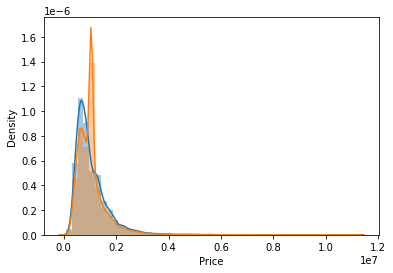

In [ ]:
print(houses.isnull().sum()) 
pr = pd.DataFrame(houses.Price.dropna())
houses.Price = houses.Price.fillna(houses.Price.mean())

sns.distplot(pr)
sns.distplot(houses.Price)

## Imputando dados com a mesma distribuição

O código aqui é talvez um pouco complexo. Fique a vontade de pular o detalhe do código. Ele não tem maior importância no que segue mas, **concentre-se no conceito e resultado que ele produz**. O mesmo preenchimento é feito para todos os dados nulos.



Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

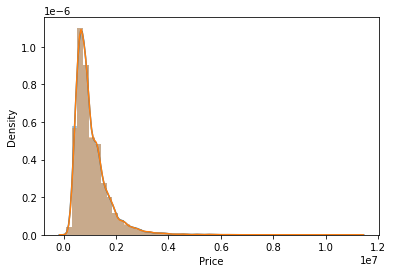

In [ ]:
houses = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Melbourne_housing_FULL.csv')

def filldist(df,col):
    v = pd.DataFrame(df[col].dropna()).reset_index()
    df[col] = df[col].fillna(-1)
    df[col] = df[col].apply(lambda x: (v.iloc[np.random.randint(len(v))][col]) if x==-1 else x)
    return df[col].isnull().sum()

filldist(houses,'Price')

sns.distplot(pr)
sns.distplot(houses.Price)

s = houses.isnull().sum()
for i in s.index:
    if s[i]!=0:
        filldist(houses,i)

houses.isnull().sum()        

De qualquer modo essa estratégia, embora não apresente qualquer distorção na distribuição dos dados, ainda pode introduzir viés na análise dos dados, sendo sempre um risco a introdução artificial dos dados e, tanto maior quanto maior o número de dados introduzidos.

Assim para análise à seguir adotaremos a estratégia de simples exclusão dos dados nulos.  

Vamos então retomar os dados originais para análise e resposta às perguntas do caso.

In [ ]:
houses = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Melbourne_housing_FULL.csv')

houses = houses.dropna()
houses.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


# **Exercício 2.** Qual a média de preços dos imóveis por ano? 

### DICA:
1. Empregue `pd.DatetimeIndex(houses.Date).year` para criar um atributo com o ano.
2. Empregue então `df.groupby(attr).attr.mean()` 


In [ ]:
# seu código



# **Exercício 3.** Alterou-se a distribuição de preços de um ano para o outro? 

### DICA:
1. Empregue `sns.distplot(x)`, sendo x a seleção de dados de Preço para um único ano
2. Você pode fazer `sns.displot()` seguidos para sobrepor os gráficos em uma mesma exibição


In [ ]:
# seu código


# **Exercício 4.** Qual o % de diferença da média de Preços 2017/2018? A diferença é significativa? 

### DICA:
1. Faça um teste de hipótese, sintaxe

`s, p = stats.ttest_ind( serie1 , serie2 , equal_var=False)`

onde `serie1` e `serie2` são as séries que você deseja comparar.

2. Para valor `p < 0.05` rejeite a Hipótese Nula (médias iguais).


In [ ]:
# seu código

In [ ]:
# seu código

# **Exercício 5.** Teste de Hipóteses

Você quer vender um imóvel em Melbourne e acredita que vendas no método 'PI' ('passed in') - digamos, com o uso de um intermediador - não tem qualquer vantagem sobre o método 'S' ('sold') - digamos, venda direta - em termos de preço e que, portanto você estaria perdendo tempo e dinheiro buscando a venda por um intermediário (digamos, corretor). Você estaria correto? 

### DICA:
1. Faça um teste de hipótese, sintaxe

`s, p = stats.ttest_ind( serie1 , serie2 , equal_var=False)`

onde `serie1` e `serie2` são as séries que você deseja comparar.

2. Para valor `p < 0.05` rejeite a Hipótese Nula (médias iguais).


In [ ]:
# seu código
   

# Caso: **`Teste A/B` Udacity, Redução de Cancelamentos pela Alteração do Site**

O Teste A/B visa comparar a efetividade de um experimento ou mudança e tem grande aplicação desde testes clínicos a avaliações de e-commerce. 

Vamos verificar de modo bastante resumido o caso real do site **Udacity**. 

**Condição Inicial**. As páginas iniciais do curso Udacity têm duas opções: "iniciar teste gratuito" e "acessar materiais do curso". Clicar em "Iniciar avaliação gratuita" solicita que o usuário insira as informações do cartão de crédito, subseqüentemente, inscrevendo-as em uma avaliação gratuita de 14 dias do curso, após o que são cobradas automaticamente. Os usuários que clicarem em "acessar materiais do curso" poderão visualizar o conteúdo do curso, mas não receberão suporte de treinamento, certificado verificado ou feedback do projeto.

**Mudança**. A Udacity testou uma mudança na qual os usuários que clicaram em "iniciar a avaliação gratuita" eram questionados sobre quanto tempo estavam dispostos a dedicar ao curso. Os usuários que escolherem 5 ou mais horas por semana serão submetidos ao processo de check-out, como de costume. Para usuários que indicam menos de 5 horas por semana, uma mensagem seria exibida indicando a necessidade de um compromisso maior de tempo para permitir o sucesso no curso e sugerindo para eles acessarem o conteúdo gratuito. Nesse ponto, o aluno teria a opção de continuar se matriculando na avaliação gratuita ou acessar os materiais do curso gratuitamente.

**Ojetivo**. Aumentar a efetividade dos alunos inscritos no teste gratuíto permitindo a empresa focar seus esforços nesses alunos.


**Desenho do Experimento**.

> **Métricas**

>> Invariant Metrics (controle): number of cookies, number of clicks, click-through-probability

>> Evaluation Metrics (objetivo): gross conversion, net conversion

# **Exercício 6.** Aquisição e Preparação dos Dados (**RESOLVIDO**)

Você pode pular os detalhes se quiser e focar na avaliação dos resultados.

In [ ]:
path = 'http://meusite.mackenzie.br/rogerio/TIC/udacity_ABTesting-master/data/'
df_control = pd.read_csv(path + "Control.csv")
df_experiment = pd.read_csv(path+ "Experiment.csv")

df_control.describe() 
df_experiment.describe()

df_control_notnull = df_control[pd.isnull(df_control.Enrollments) != True]
df_experiment_notnull = df_experiment[pd.isnull(df_control.Enrollments) != True]

df_SignTest = pd.merge(df_control_notnull,df_experiment_notnull,on="Date")
df_SignTest['GrossConversion_cont'] = df_SignTest.Enrollments_x/df_SignTest.Clicks_x
df_SignTest['GrossConversion_exp'] = df_SignTest.Enrollments_y/df_SignTest.Clicks_y
df_SignTest['NetConversion_cont'] = df_SignTest.Payments_x/df_SignTest.Clicks_x
df_SignTest['NetConversion_exp'] = df_SignTest.Payments_y/df_SignTest.Clicks_y

cols = ['Date','GrossConversion_cont','GrossConversion_exp','NetConversion_cont','NetConversion_exp']

df_SignTest = df_SignTest[cols]
# df_SignTest.describe()

print(df_SignTest)
print('NetConversion controle......: {:.2f} %'.format(df_SignTest.NetConversion_cont.mean()*100))
print('NetConversion experimento...: {:.2f} %'.format(df_SignTest.NetConversion_exp.mean()*100))

print('GrossCoversion controle.....: {:.2f} %'.format(df_SignTest.GrossConversion_cont.mean()*100))
print('GrossConversion experimento.: {:.2f} %'.format(df_SignTest.GrossConversion_exp.mean()*100))



           Date  GrossConversion_cont  ...  NetConversion_cont  NetConversion_exp
0   Sat, Oct 11              0.195051  ...            0.101892           0.049563
1   Sun, Oct 12              0.188703  ...            0.089859           0.115924
2   Mon, Oct 13              0.183718  ...            0.104510           0.089367
3   Tue, Oct 14              0.186603  ...            0.125598           0.111245
4   Wed, Oct 15              0.194743  ...            0.076464           0.112981
5   Thu, Oct 16              0.167679  ...            0.099635           0.077411
6   Fri, Oct 17              0.195187  ...            0.101604           0.056410
7   Sat, Oct 18              0.174051  ...            0.110759           0.095092
8   Sun, Oct 19              0.189580  ...            0.086831           0.110473
9   Mon, Oct 20              0.191638  ...            0.112660           0.113953
10  Tue, Oct 21              0.226067  ...            0.121107           0.082176
11  Wed, Oct 22 

# **Exercício 7.** Teste de Hipóteses

a. Aplique o t-test agora para as duas métricas de avaliação. Quais os resultados para essas duas métricas?

b, Qual seria a utilidade de fazer teste nas variáveis de controle e qual o resultado desejado? 

In [ ]:
# seu código


p-value: 0.1308
Aceita a Hipótese Nula
p-value: 0.5928
Aceita a Hipótese Nula


**Conclusão**: A mudança no site não foi efetiva para aumentar a efetividade dos alunos que aderiam ao teste gratuíto dos cursos.

# Caso: **Covid X Temperatura** 

# **Exercício 8.** Empregue o data set abaixo para testar as hipóteses,

> $H_0$: a temperatura >= 24 C não afeta o surto de COVID-19

> $H_1$: a temperatura >= 24 C afeta o surto de COVID-19

**DICA**: Empregue o valor de temperatura para separar os casos confirmados da doença.

In [ ]:
covid = pd.read_csv('http://meusite.mackenzie.br/rogerio/Corona_Updated.csv')
covid.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Temprature,Humidity,Temp_Cat,Humid_Cat
0,Hubei,Mainland China,2020-03-10T15:13:05,67760,3024,47743,30.9756,112.2707,12.5,86,0,1
1,NaN,Italy,2020-03-10T17:53:02,10149,631,724,43.0000,12.0000,12.9,64,0,1
2,NaN,Iran (Islamic Republic of),2020-03-10T19:13:20,8042,291,2731,32.0000,53.0000,11.9,9,0,0
3,NaN,Republic of Korea,2020-03-10T19:13:20,7513,54,247,36.0000,128.0000,4.9,41,0,0
4,NaN,France,2020-03-10T18:53:02,1784,33,12,47.0000,2.0000,11.9,93,0,0


In [ ]:
# seu código

In [ ]:
# seu código